In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

import matplotlib.pyplot as plt 
plt.rc("font", size=14)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings

import locale
locale.setlocale(locale.LC_ALL, "Portuguese_Brazil.1252")
import matplotlib as mpl
mpl.rcParams['axes.formatter.use_locale'] = True

warnings.filterwarnings("ignore")

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [7]:
df = pd.read_excel('atendimento_v3.xls', sep=';', thousands='.', decimal =',')
df.head()

,CODATENDIMENTO,DATA_ABERTURA_ATT,DATA_DANO,MONTADORA,QTDBLOQUEIOS_MONTADORA,CODFAMILIA,QTDBLOQUEIOS_FAMILIA,CODSCRIPT,TIPOSCRIPT,QTDBLOQUEIOS_TIPOSCRIPT,...,QTDDIAS_ABERTURA_ATT_DANO,VALFRANQUIA,QTDBLOQUEIOS_OBJETOCAUSA,IDTACEITASMS,DIFERENCAMESINICIO,DIFERENCAMESFIM,ANO_VEICULO,VEICULO_NACIONAL,VALVEICULO,DESFECHO
0,9370665,2019-02-11,2019-01-12,VOLKSWAGEN,6472,2381,52,1,FAROL/LANTERNA PASS/UTIL I-A,4859,...,30,315.0,8578,1,24,120,2019,0,0,1
1,9092018,2018-11-27,2018-11-27,VOLKSWAGEN,6472,2381,52,1,FAROL/LANTERNA AUXILIAR PASS/UTIL I-A,740,...,0,196.0,8578,1,68,579,2019,0,69110,1
2,9094423,2018-11-27,2018-11-25,VOLKSWAGEN,6472,2381,52,4,RETROVISORES,1372,...,2,150.0,15652,1,132,42,2019,1,76485,1
3,9165891,2018-12-17,2018-12-16,VOLKSWAGEN,6472,2381,52,3,RETROVISOR PASS/UTIL LED I-A,833,...,1,0.0,510,1,45,60,2019,0,0,1
4,9165885,2018-12-17,2018-12-16,VOLKSWAGEN,6472,2381,52,3,RETROVISOR PASS/UTIL LED I-A,833,...,1,0.0,510,1,45,60,2019,0,0,1


In [8]:
df['TARGET'] = df['DESFECHO']
df['DESFECHO'] = ['LIBERADO' if x == 0 else 'BLOQUEADO' for x in df['TARGET']]

In [9]:
ordem_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']

In [10]:
df['DATA_ABERTURA_ATT'] =  pd.to_datetime(df['DATA_ABERTURA_ATT'], format='%d/%m/%Y')
df['DIA_SEMANA'] = df.DATA_ABERTURA_ATT.dt.weekday_name

<Figure size 432x576 with 0 Axes>

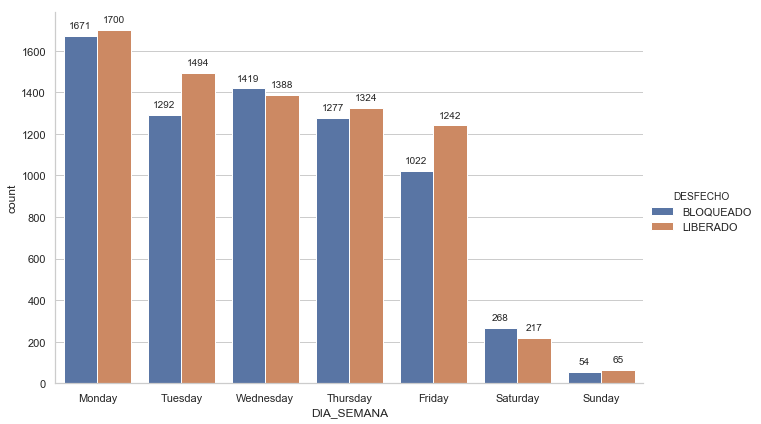

In [11]:
plt.figure(figsize=(6, 8))
splot = sns.factorplot('DIA_SEMANA', data=df, hue='DESFECHO', kind='count', size=6, aspect=1.5, order=ordem_dias, ci = None)

qtd_desfecho = []
for p in splot.ax.patches:
    splot.ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    qtd_desfecho.append(p.get_height())
#     splot.ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [12]:
print(ordem_dias)
print(qtd_desfecho[:7])
print(qtd_desfecho[7:])

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
[1671, 1292, 1419, 1277, 1022, 268, 54]
[1700, 1494, 1388, 1324, 1242, 217, 65]


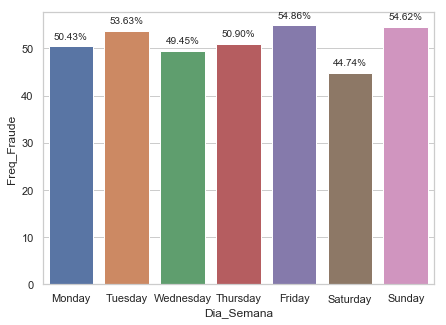

In [13]:
frq = []
for i in range(7):
    frq.append( round((qtd_desfecho[7+i] / (qtd_desfecho[i]+qtd_desfecho[7+i])) * 100, 2) )

df_frq = pd.DataFrame({'Dia_Semana':ordem_dias,'Freq_Fraude':frq})

plt.figure(figsize=(7, 5))

splot = sns.barplot(data=df_frq, x = 'Dia_Semana', y = 'Freq_Fraude', ci = None)
# plt.title('Frequência de Bloqueados no Dia da semana do Atendimento', fontsize=16)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f') +'%', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [14]:
print(df_frq.describe())
print('CV\t  %s' % format(1.869442 / 15.571429,'.6f'))

       Freq_Fraude
count     7.000000
mean     51.232857
std       3.569929
min      44.740000
25%      49.940000
50%      50.900000
75%      54.125000
max      54.860000
CV	  0.120056


In [15]:
df['DATA_DANO'] = pd.to_datetime(df['DATA_DANO'], format='%d/%m/%Y')
df['DIA_DANO'] = df.DATA_DANO.dt.weekday_name

<Figure size 432x576 with 0 Axes>

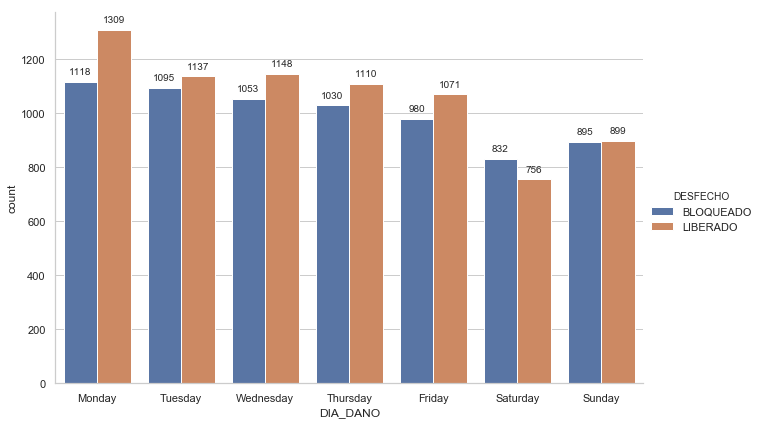

In [16]:
plt.figure(figsize=(6, 8))
splot = sns.factorplot('DIA_DANO', data=df, hue='DESFECHO', kind='count', size=6, aspect=1.5, order=ordem_dias, ci = None)

qtd_desfecho_dano = []
for p in splot.ax.patches:
    splot.ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    qtd_desfecho_dano.append(p.get_height())
#     splot.ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [17]:
print(ordem_dias)
print(qtd_desfecho_dano[:7])
print(qtd_desfecho_dano[7:])

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
[1118, 1095, 1053, 1030, 980, 832, 895]
[1309, 1137, 1148, 1110, 1071, 756, 899]


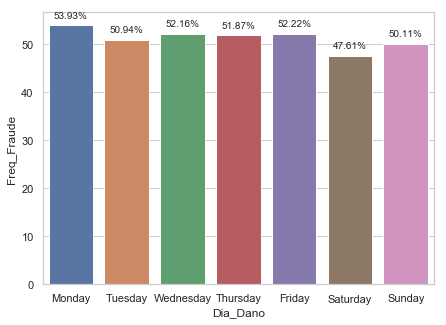

In [18]:
frq_dano = []
for i in range(7):
    frq_dano.append( round((qtd_desfecho_dano[7+i] / (qtd_desfecho_dano[i]+qtd_desfecho_dano[7+i])) * 100, 2) )

df_frq_dano = pd.DataFrame({'Dia_Dano':ordem_dias,'Freq_Fraude':frq_dano})

plt.figure(figsize=(7, 5))

splot = sns.barplot(data=df_frq_dano, x = 'Dia_Dano', y = 'Freq_Fraude', ci = None)
# plt.title('Frequência de Bloqueados no Dia da semana da Data do Dano', fontsize=16)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f') +'%', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [19]:
df['DIFF_DIAS_ATT_DANO'] = df.DATA_ABERTURA_ATT - df.DATA_DANO
df.DIFF_DIAS_ATT_DANO = df.DIFF_DIAS_ATT_DANO.dt.days

df[df['DIFF_DIAS_ATT_DANO'] >= 1000]

,CODATENDIMENTO,DATA_ABERTURA_ATT,DATA_DANO,MONTADORA,QTDBLOQUEIOS_MONTADORA,CODFAMILIA,QTDBLOQUEIOS_FAMILIA,CODSCRIPT,TIPOSCRIPT,QTDBLOQUEIOS_TIPOSCRIPT,...,DIFERENCAMESINICIO,DIFERENCAMESFIM,ANO_VEICULO,VEICULO_NACIONAL,VALVEICULO,DESFECHO,TARGET,DIA_SEMANA,DIA_DANO,DIFF_DIAS_ATT_DANO


In [20]:
import numpy as np
import pandas as pd

def detect_outlier(data_1):
    outliers=[]    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [21]:
# sns.factorplot('DESFECHO', data=df, hue='DIA_SEMANA', kind='count', size=6, aspect=2, order=ordem_dias)
outlier_datapoints = []
outlier_datapoints = detect_outlier(df.DIFF_DIAS_ATT_DANO)
print('Qtde Outliers: %s' % str(len(outlier_datapoints)))

Qtde Outliers: 351


In [22]:
def outlier_hunt(df1):
    from collections import Counter
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df1.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df1[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df1[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df1[(df1[col] < Q1 - outlier_step) | (df1[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

In [23]:
df.columns.tolist()

['CODATENDIMENTO',
 'DATA_ABERTURA_ATT',
 'DATA_DANO',
 'MONTADORA',
 'QTDBLOQUEIOS_MONTADORA',
 'CODFAMILIA',
 'QTDBLOQUEIOS_FAMILIA',
 'CODSCRIPT',
 'TIPOSCRIPT',
 'QTDBLOQUEIOS_TIPOSCRIPT',
 'IDADE_VEICULO',
 'QTDDIAS_ABERTURA_ATT_DANO',
 'VALFRANQUIA',
 'QTDBLOQUEIOS_OBJETOCAUSA',
 'IDTACEITASMS',
 'DIFERENCAMESINICIO',
 'DIFERENCAMESFIM',
 'ANO_VEICULO',
 'VEICULO_NACIONAL',
 'VALVEICULO',
 'DESFECHO',
 'TARGET',
 'DIA_SEMANA',
 'DIA_DANO',
 'DIFF_DIAS_ATT_DANO']

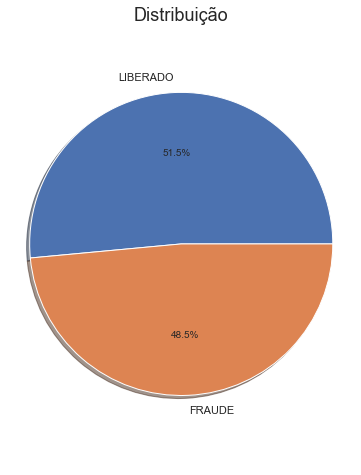

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,8))
plt.pie(df['DESFECHO'].value_counts(), labels=['LIBERADO', 'FRAUDE'], autopct='%1.1f%%',shadow=True, startangle=0)
plt.axis('equal')
plt.title('Distribuição', size=18)
plt.show()

In [25]:
features = ['CODATENDIMENTO',
 'DATA_ABERTURA_ATT',
 'DATA_DANO',
 'MONTADORA',
 'QTDBLOQUEIOS_MONTADORA',
 'CODFAMILIA',
 'QTDBLOQUEIOS_FAMILIA',
 'CODSCRIPT',
 'TIPOSCRIPT',
 'QTDBLOQUEIOS_TIPOSCRIPT',
 'IDADE_VEICULO',
 'QTDDIAS_ABERTURA_ATT_DANO',
 'VALFRANQUIA',
 'QTDBLOQUEIOS_OBJETOCAUSA',
 'IDTACEITASMS',
 'DIFERENCAMESINICIO',
 'DIFERENCAMESFIM',
 'ANO_VEICULO',
 'VEICULO_NACIONAL',
 'VALVEICULO',
 'DIA_SEMANA',
 'DIA_DANO']

In [26]:
df1 = df.drop(['CODATENDIMENTO', 'DATA_ABERTURA_ATT', 'DATA_DANO', 'MONTADORA','CODFAMILIA','CODSCRIPT','DATA_ABERTURA_ATT','IDTACEITASMS'], axis= 1)

In [27]:
df1.describe()

,QTDBLOQUEIOS_MONTADORA,QTDBLOQUEIOS_FAMILIA,QTDBLOQUEIOS_TIPOSCRIPT,IDADE_VEICULO,QTDDIAS_ABERTURA_ATT_DANO,VALFRANQUIA,QTDBLOQUEIOS_OBJETOCAUSA,DIFERENCAMESINICIO,DIFERENCAMESFIM,ANO_VEICULO,VEICULO_NACIONAL,VALVEICULO,TARGET,DIFF_DIAS_ATT_DANO
count,14433.000000,14433.000000,14433.000000,14433.000000,14433.000000,14433.000000,14433.000000,14433.000000,14433.000000,14433.000000,14433.000000,14433.000000,14433.000000,14433.000000
mean,4944.633202,627.939098,4143.095129,5.690432,11.832052,186.192361,9337.907226,186.383704,193.698400,2013.309568,0.454098,31859.634795,0.485208,11.832052
std,2694.697779,485.343405,2573.446106,3.541573,32.202877,352.292258,5417.035019,130.544053,149.672686,3.541573,0.497906,36697.675777,0.499798,32.202877
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,2530.000000,192.000000,2605.000000,3.000000,1.000000,100.000000,4444.000000,78.000000,84.000000,2011.000000,0.000000,0.000000,0.000000,1.000000
50%,6472.000000,538.000000,3005.000000,5.000000,2.000000,141.000000,9568.000000,178.000000,182.000000,2014.000000,0.000000,25901.000000,0.000000,2.000000
75%,7728.000000,1023.000000,5181.000000,8.000000,7.000000,217.000000,15652.000000,278.000000,284.000000,2016.000000,1.000000,43000.000000,1.000000,7.000000
max,7857.000000,1668.000000,8488.000000,49.000000,390.000000,33000.000000,15652.000000,1418.000000,1691.000000,2019.000000,1.000000,651222.000000,1.000000,390.000000


In [28]:
from statsmodels.stats import proportion

count_no_sub = len(df1[df1['TARGET']==0])
count_sub = len(df1[df1['TARGET']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("Percentual de Não-Fraude:", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("Percentual de Frade:", pct_of_sub*100)

conf=proportion.proportion_confint((df1['TARGET']==1).sum(), df1['TARGET'].count(), alpha=0.05, method='normal')
print('A chance de ser Fraude com intervalo de confiança de 95% é:{}'.format(conf))

Percentual de Não-Fraude: 51.47924894339361
Percentual de Frade: 48.520751056606386
A chance de ser Fraude com intervalo de confiança de 95% é:(0.4770539060290915, 0.49336111510303626)


In [29]:
df1['TARGET'].value_counts()

0    7430
1    7003
Name: TARGET, dtype: int64

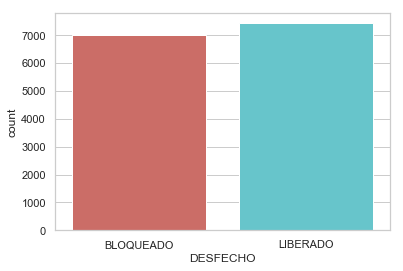

In [30]:
sns.countplot(x='DESFECHO',data=df1, palette='hls')
plt.show()

In [31]:
df1.columns

Index(['QTDBLOQUEIOS_MONTADORA', 'QTDBLOQUEIOS_FAMILIA', 'TIPOSCRIPT',
       'QTDBLOQUEIOS_TIPOSCRIPT', 'IDADE_VEICULO', 'QTDDIAS_ABERTURA_ATT_DANO',
       'VALFRANQUIA', 'QTDBLOQUEIOS_OBJETOCAUSA', 'DIFERENCAMESINICIO',
       'DIFERENCAMESFIM', 'ANO_VEICULO', 'VEICULO_NACIONAL', 'VALVEICULO',
       'DESFECHO', 'TARGET', 'DIA_SEMANA', 'DIA_DANO', 'DIFF_DIAS_ATT_DANO'],
      dtype='object')

In [32]:
import datetime
ano_atual = datetime.datetime.now().year

In [33]:
df1.ANO_VEICULO = df1.ANO_VEICULO.replace('ANO INVALIDO', '1970')
df1.ANO_VEICULO = df1.ANO_VEICULO.astype(int)
df1.DIFERENCAMESINICIO = df1.DIFERENCAMESINICIO.astype(float)
df1.DIFERENCAMESINICIO = df1.DIFERENCAMESINICIO.astype(float)
df1['IDADE_VEICULO'] = ano_atual - df1.ANO_VEICULO

In [34]:
df1[['DESFECHO','IDADE_VEICULO', 'VALFRANQUIA', 'DIFERENCAMESINICIO', 'DIFERENCAMESFIM','VALVEICULO']].groupby('DESFECHO').mean()

,IDADE_VEICULO,VALFRANQUIA,DIFERENCAMESINICIO,DIFERENCAMESFIM,VALVEICULO
DESFECHO,,,,,
BLOQUEADO,5.732686,183.109793,189.307154,197.978866,30883.797087
LIBERADO,5.650606,189.097774,183.628264,189.663930,32779.391386


In [35]:
df1[['IDADE_VEICULO', 'VALFRANQUIA', 'DIFERENCAMESINICIO', 'DIFERENCAMESFIM','VALVEICULO','DESFECHO']].groupby('IDADE_VEICULO').mean().head()

,VALFRANQUIA,DIFERENCAMESINICIO,DIFERENCAMESFIM,VALVEICULO
IDADE_VEICULO,,,,
0,229.190041,97.956701,227.777320,48018.758763
1,247.861912,174.596787,197.938153,40542.677108
2,218.417586,192.237488,186.076546,40101.734053
3,196.829864,199.575566,200.955656,35420.391855
4,180.598079,187.241257,201.278601,36021.701838


Text(0,0.5,'Desfecho')

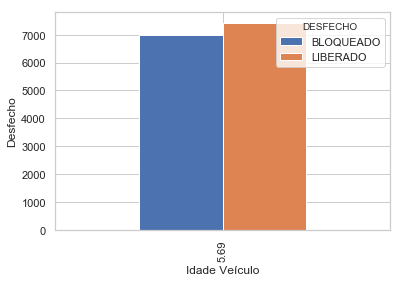

In [36]:
%matplotlib inline
pd.crosstab(round(df1.IDADE_VEICULO.mean(),2),df1.DESFECHO).plot(kind='bar')
plt.xlabel('Idade Veículo')
plt.ylabel('Desfecho')

In [311]:
# corrmat = df1.corr()
# top_corr_features = corrmat.index
# plt.figure(figsize=(20,20))
# g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

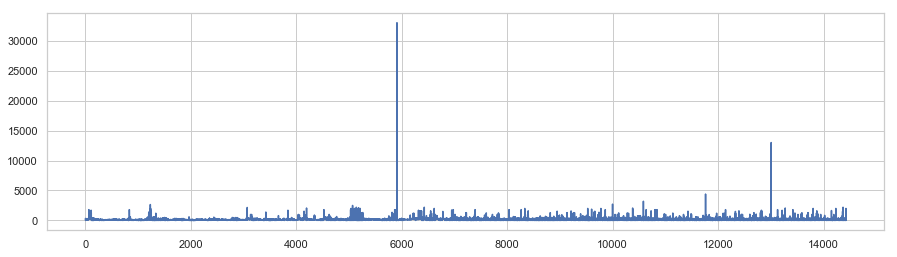

In [37]:
# df1[["MEDIA_VALVEICULO", "MEDIA_VALFRANQUIA"]].plot(figsize=(15, 4), title='Valores', grid=True)
df1.VALFRANQUIA.plot(figsize=(15, 4))

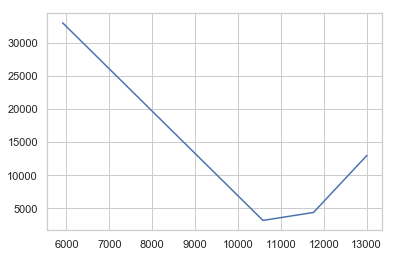

In [38]:
df1[df1['VALFRANQUIA'] > 3000].VALFRANQUIA.plot()

### IDENTIFICAÇÃO DE OUTLIERS NO VALOR DE FRANQUIA

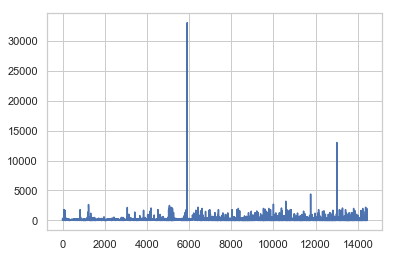

In [39]:
df1.VALFRANQUIA.plot()

In [40]:
outlier_datapoints = []
outlier_datapoints = detect_outlier(df1.VALFRANQUIA)
print('Qtde Outliers: %s' % str(len(outlier_datapoints)))

Qtde Outliers: 118


Text(0,0.5,'Valor de Franquia - Outliers')

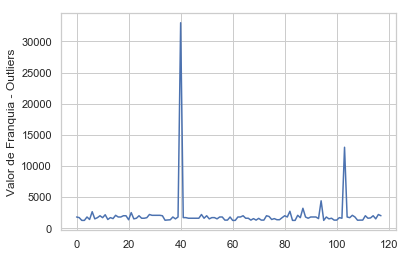

In [41]:
plt.plot(outlier_datapoints)
plt.ylabel('Valor de Franquia - Outliers')

In [42]:
q1, q3= np.percentile(df1.VALFRANQUIA,[25,75])

In [43]:
print('Q1 (Primeiro quartil): %5.2f' % q1)
print('Q3 (Terceiro quartil): %5.2f' % q3)

Q1 (Primeiro quartil): 100.00
Q3 (Terceiro quartil): 217.00


In [44]:
iqr = q3 - q1
print('IQR (Amplitude interquartil): %5.2f' % iqr)

IQR (Amplitude interquartil): 117.00


In [45]:
lower_bound = q1 - (1.5 * q1)
upper_bound = q3 + (1.5 * q3)

print('Lower Outlier Boundary (LOB): %5.2f' % lower_bound)
print('Upper Outlier Boundary (UOB): %5.2f' % upper_bound)

Lower Outlier Boundary (LOB): -50.00
Upper Outlier Boundary (UOB): 542.50


### CRIAÇÃO DE FAIXAS DE FRANQUIA UTILIZANDO O "IQR"

In [46]:
df1.loc[(df1['VALFRANQUIA'] <= 0), 'FAIXA_FRANQUIA'] = 'ATE_0'
df1.loc[(df1['VALFRANQUIA'] > 0) & (df1['VALFRANQUIA'] <= 120), 'FAIXA_FRANQUIA'] = 'ATE_120'
df1.loc[(df1['VALFRANQUIA'] > 120) & (df1['VALFRANQUIA'] <= 240), 'FAIXA_FRANQUIA'] = 'ATE_240'
df1.loc[(df1['VALFRANQUIA'] > 240) & (df1['VALFRANQUIA'] <= 360), 'FAIXA_FRANQUIA'] = 'ATE_360'
df1.loc[(df1['VALFRANQUIA'] > 360) & (df1['VALFRANQUIA'] <= 480), 'FAIXA_FRANQUIA'] = 'ATE_480'
df1.loc[df1['VALFRANQUIA'] > 480, 'FAIXA_FRANQUIA'] = 'MAIOR_480'

Text(0,0.5,'Valor Franquia')

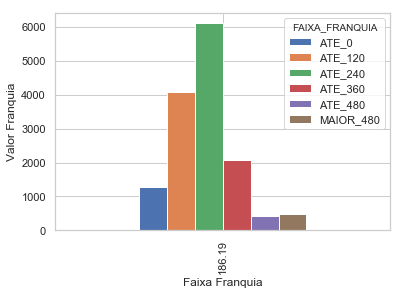

In [47]:
pd.crosstab(round(df1.VALFRANQUIA.mean(),2),df1.FAIXA_FRANQUIA).plot(kind='bar')
plt.xlabel('Faixa Franquia')
plt.ylabel('Valor Franquia')

In [48]:
ordem_fx_fraq = ['ATE_0', 'ATE_120', 'ATE_240', 'ATE_360', 'ATE_480', 'MAIOR_480']
ordem_fx_fraq

['ATE_0', 'ATE_120', 'ATE_240', 'ATE_360', 'ATE_480', 'MAIOR_480']

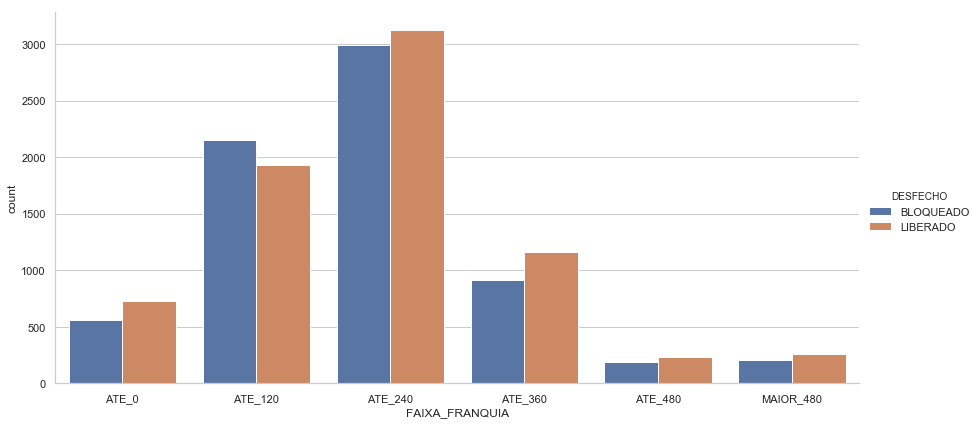

In [49]:
sns.factorplot('FAIXA_FRANQUIA', data=df1, hue='DESFECHO', kind='count', size=6, aspect=2, order=ordem_fx_fraq)

### IDENTIFICAÇÃO DE OUTLIERS NO VALOR DE VEICULO

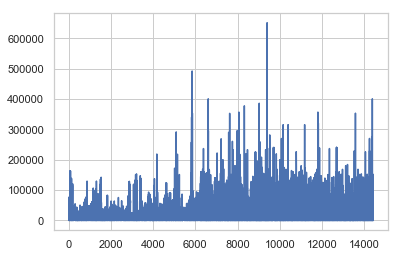

In [50]:
df1.VALVEICULO.plot()

In [51]:
outlier_valveiculo = []
outlier_valveiculo = detect_outlier(df1.VALVEICULO)
print('Qtde Outliers: %s' % str(len(outlier_valveiculo)))

Qtde Outliers: 245


Text(0,0.5,'Valor de Veículo - Outliers')

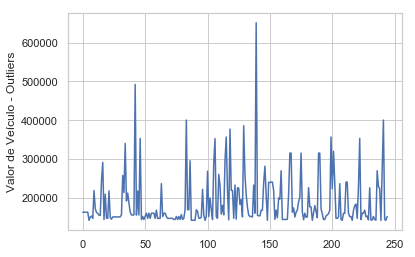

In [52]:
plt.plot(outlier_valveiculo)
plt.ylabel('Valor de Veículo - Outliers')

In [53]:
q1, q3= np.percentile(df1.VALVEICULO,[25,75])

In [54]:
print('Q1 (Primeiro quartil): %5.2f' % q1)
print('Q3 (Terceiro quartil): %5.2f' % q3)

Q1 (Primeiro quartil):  0.00
Q3 (Terceiro quartil): 43000.00


In [55]:
iqr = q3 - q1
print('IQR (Amplitude interquartil): %5.2f' % iqr)

IQR (Amplitude interquartil): 43000.00


In [56]:
lower_bound = q1 - (1.5 * q1)
upper_bound = q3 + (1.5 * q3)

print('Lower Outlier Boundary (LOB): %5.2f' % lower_bound)
print('Upper Outlier Boundary (UOB): %5.2f' % upper_bound)

Lower Outlier Boundary (LOB):  0.00
Upper Outlier Boundary (UOB): 107500.00


In [57]:
df1.loc[(df1['VALVEICULO'] <= 0), 'FAIXA_VEICULO'] = 'ATE_0'
df1.loc[(df1['VALVEICULO'] > 0) & (df1['VALVEICULO'] <= 42000), 'FAIXA_VEICULO'] = 'ATE_42000'
df1.loc[(df1['VALVEICULO'] > 42000) & (df1['VALVEICULO'] <= 84000), 'FAIXA_VEICULO'] = 'ATE_84000'
df1.loc[df1['VALVEICULO'] > 84000, 'FAIXA_VEICULO'] = 'MAIOR_84000'

Text(0,0.5,'Valor Veiculo')

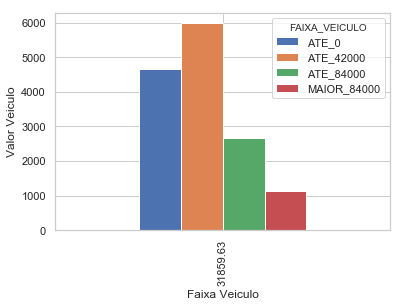

In [58]:
pd.crosstab(round(df1.VALVEICULO.mean(),2),df1.FAIXA_VEICULO).plot(kind='bar')
plt.xlabel('Faixa Veiculo')
plt.ylabel('Valor Veiculo')

In [59]:
ordem_fx_veiculo = ['ATE_0', 'ATE_42000', 'ATE_84000', 'MAIOR_84000']
ordem_fx_veiculo

['ATE_0', 'ATE_42000', 'ATE_84000', 'MAIOR_84000']

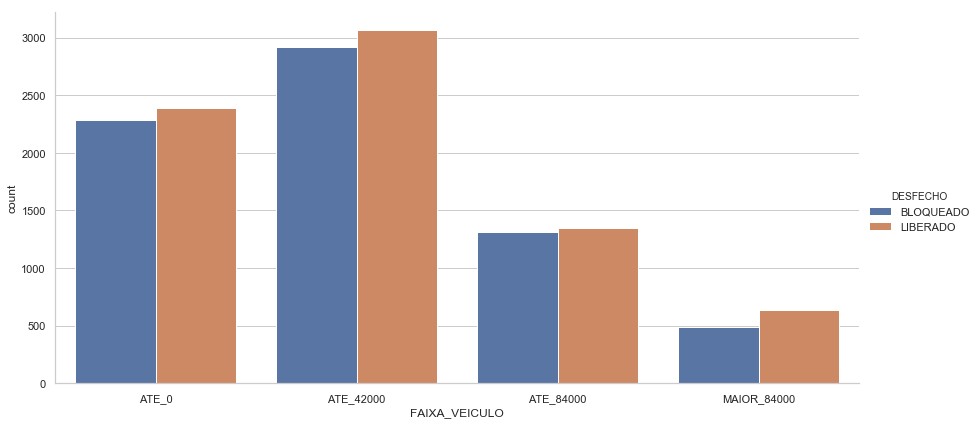

In [60]:
sns.factorplot('FAIXA_VEICULO', data=df1, hue='DESFECHO', kind='count', size=6, aspect=2, order=ordem_fx_veiculo)

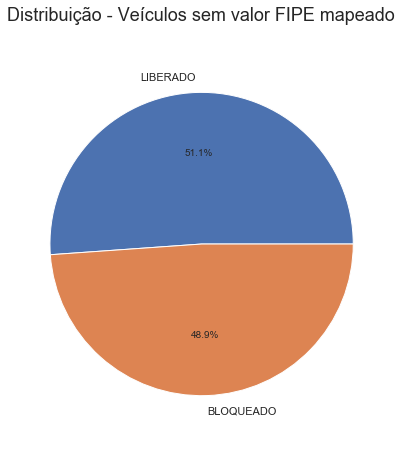

In [61]:
plt.figure(figsize=(6,8))
plt.pie(df1[df1.VALVEICULO==0]['DESFECHO'].value_counts(), labels=['LIBERADO','BLOQUEADO'], autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.title('Distribuição - Veículos sem valor FIPE mapeado', size=18)
plt.show()

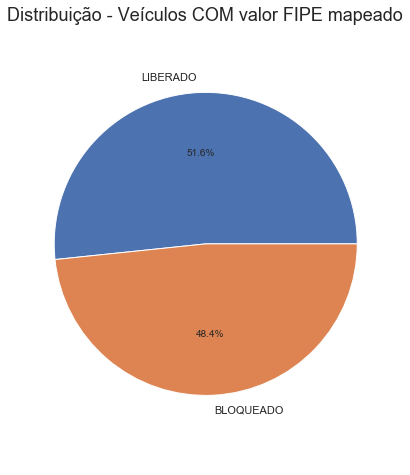

In [62]:
plt.figure(figsize=(6,8))
plt.pie(df1[df1.VALVEICULO>0]['DESFECHO'].value_counts(), labels=['LIBERADO','BLOQUEADO'], autopct='%1.1f%%',startangle=0)
plt.axis('equal')
plt.title('Distribuição - Veículos COM valor FIPE mapeado', size=18)
plt.show()

### REMOÇÃO DOS OUTLIERS

In [63]:
features = df1.columns[:-2].tolist()

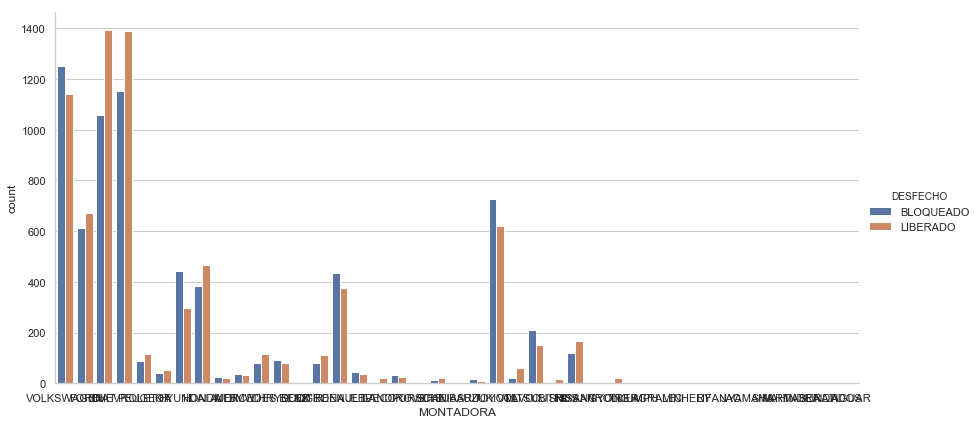

In [64]:
sns.factorplot('MONTADORA', data=df, hue='DESFECHO', kind='count', size=6, aspect=2)

In [65]:
features

['QTDBLOQUEIOS_MONTADORA',
 'QTDBLOQUEIOS_FAMILIA',
 'TIPOSCRIPT',
 'QTDBLOQUEIOS_TIPOSCRIPT',
 'IDADE_VEICULO',
 'QTDDIAS_ABERTURA_ATT_DANO',
 'VALFRANQUIA',
 'QTDBLOQUEIOS_OBJETOCAUSA',
 'DIFERENCAMESINICIO',
 'DIFERENCAMESFIM',
 'ANO_VEICULO',
 'VEICULO_NACIONAL',
 'VALVEICULO',
 'DESFECHO',
 'TARGET',
 'DIA_SEMANA',
 'DIA_DANO',
 'DIFF_DIAS_ATT_DANO']

In [66]:
from sklearn import preprocessing

df_enc = df1[:]  
df_train = df1[:]   
for cols in df1.columns:
    if (df1[cols].dtype == object):                
        le = preprocessing.LabelEncoder()    
        le.fit(df1[cols].unique())    
        df_enc[cols] = le.transform(df1[cols])
        df_train[cols] = le.inverse_transform(df_enc[cols])        
df_enc.head(10)  

,QTDBLOQUEIOS_MONTADORA,QTDBLOQUEIOS_FAMILIA,TIPOSCRIPT,QTDBLOQUEIOS_TIPOSCRIPT,IDADE_VEICULO,QTDDIAS_ABERTURA_ATT_DANO,VALFRANQUIA,QTDBLOQUEIOS_OBJETOCAUSA,DIFERENCAMESINICIO,DIFERENCAMESFIM,ANO_VEICULO,VEICULO_NACIONAL,VALVEICULO,DESFECHO,TARGET,DIA_SEMANA,DIA_DANO,DIFF_DIAS_ATT_DANO,FAIXA_FRANQUIA,FAIXA_VEICULO
0,6472,52,12,4859,0,30,315.0,8578,24.0,120,2019,0,0,0,1,1,2,30,3,0
1,6472,52,3,740,0,0,196.0,8578,68.0,579,2019,0,69110,0,1,5,5,0,2,2
2,6472,52,30,1372,0,2,150.0,15652,132.0,42,2019,1,76485,0,1,5,3,2,2,2
3,6472,52,28,833,0,1,0.0,510,45.0,60,2019,0,0,0,1,1,3,1,0,0
4,6472,52,28,833,0,1,0.0,510,45.0,60,2019,0,0,0,1,1,3,1,0,0
5,6472,52,19,2605,1,1,130.0,15652,33.0,332,2018,0,73949,0,1,6,5,1,2,2
6,6472,52,19,2605,1,23,130.0,15652,218.0,147,2018,0,55326,0,1,4,5,23,2,2
7,6472,52,41,3005,1,0,252.0,1595,155.0,210,2018,0,55326,0,1,6,6,0,3,2
8,6472,52,39,5181,0,1,326.0,9568,139.0,226,2019,0,61326,0,1,6,5,1,3,2
9,6472,302,30,1372,2,3,140.0,510,260.0,105,2017,0,39505,0,1,1,0,3,2,1


In [67]:
def outlier_hunt(df_enc):
    from collections import Counter
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df_enc.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df1[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df1[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df_enc[(df_enc[col] < Q1 - outlier_step) | (df_enc[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

In [68]:
print(df_enc.shape)

(14433, 20)


In [69]:
df1 = df_enc

In [65]:
outlier_indices = outlier_hunt(df1[features])
df1 = df1.drop(outlier_indices).reset_index(drop=True)
print(df1.shape)

(40646, 20)


In [70]:
df1.head()

,QTDBLOQUEIOS_MONTADORA,QTDBLOQUEIOS_FAMILIA,TIPOSCRIPT,QTDBLOQUEIOS_TIPOSCRIPT,IDADE_VEICULO,QTDDIAS_ABERTURA_ATT_DANO,VALFRANQUIA,QTDBLOQUEIOS_OBJETOCAUSA,DIFERENCAMESINICIO,DIFERENCAMESFIM,ANO_VEICULO,VEICULO_NACIONAL,VALVEICULO,DESFECHO,TARGET,DIA_SEMANA,DIA_DANO,DIFF_DIAS_ATT_DANO,FAIXA_FRANQUIA,FAIXA_VEICULO
0,6472,52,12,4859,0,30,315.0,8578,24.0,120,2019,0,0,0,1,1,2,30,3,0
1,6472,52,3,740,0,0,196.0,8578,68.0,579,2019,0,69110,0,1,5,5,0,2,2
2,6472,52,30,1372,0,2,150.0,15652,132.0,42,2019,1,76485,0,1,5,3,2,2,2
3,6472,52,28,833,0,1,0.0,510,45.0,60,2019,0,0,0,1,1,3,1,0,0
4,6472,52,28,833,0,1,0.0,510,45.0,60,2019,0,0,0,1,1,3,1,0,0


In [67]:
df.join(df1, lsuffix='_', rsuffix='_other')

,CODATENDIMENTO,DATA_ABERTURA_ATT,DATA_DANO,MONTADORA,QTDBLOQUEIOS_MONTADORA_,CODFAMILIA,QTDBLOQUEIOS_FAMILIA_,CODSCRIPT,TIPOSCRIPT_,QTDBLOQUEIOS_TIPOSCRIPT_,...,ANO_VEICULO_other,VEICULO_NACIONAL_other,VALVEICULO_other,DESFECHO_other,TARGET_other,DIA_SEMANA_other,DIA_DANO_other,DIFF_DIAS_ATT_DANO_other,FAIXA_FRANQUIA,FAIXA_VEICULO
0,9253877,2019-01-10,2019-01-09,VOLKSWAGEN,6472,2381,52,2,VIDRO PASS/UTIL I-A,5181,...,2018,0,55326,1,0,4,6,1,3,2
1,9119385,2018-12-04,2018-12-04,VOLKSWAGEN,6472,2381,52,2,VIDRO PASS/UTIL I-A,5181,...,2019,0,57451,1,0,5,5,0,3,2
2,9061708,2018-11-19,2018-11-18,VOLKSWAGEN,6472,2381,52,2,VIDRO PASS/UTIL I-A,5181,...,2018,0,55326,1,0,1,3,1,3,2
3,9059634,2018-11-19,2018-11-14,VOLKSWAGEN,6472,2381,52,6,VIDRO PASS/UTIL I-A,5181,...,2018,0,55326,1,0,1,6,5,3,2
4,9300822,2019-01-22,2019-01-22,VOLKSWAGEN,6472,2381,52,2,VIDRO PASS/UTIL I-A,5181,...,2018,0,66633,1,0,5,5,0,3,2
5,9204259,2018-12-27,2018-12-22,VOLKSWAGEN,6472,2381,52,3,FAROL/LANTERNA PASS/UTIL I-A,4859,...,2018,0,55326,1,0,4,2,5,2,2
6,9117929,2018-12-04,2018-11-30,VOLKSWAGEN,6472,2506,2,2,VIDRO CARGA N-A,424,...,2006,1,90033,1,0,5,0,4,2,3
7,9306036,2019-01-23,2019-01-22,VOLKSWAGEN,6472,2506,2,2,VIDRO CARGA N-A,424,...,2006,1,90033,1,0,6,5,1,2,3
8,9186380,2018-12-20,2018-12-19,VOLKSWAGEN,6472,2112,302,1,FAROL/LANTERNA PASS/UTIL I-A,4859,...,2016,0,35451,1,0,4,6,1,3,1
9,9009110,2018-11-03,2018-10-30,VOLKSWAGEN,6472,2112,302,1,FAROL/LANTERNA PASS/UTIL N-A,8488,...,2017,0,34215,1,0,2,5,4,2,1


In [68]:
print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df1[features]))))   

The dataset contains 262 observations with more than 2 outliers


In [71]:
print(features)

['QTDBLOQUEIOS_MONTADORA', 'QTDBLOQUEIOS_FAMILIA', 'TIPOSCRIPT', 'QTDBLOQUEIOS_TIPOSCRIPT', 'IDADE_VEICULO', 'QTDDIAS_ABERTURA_ATT_DANO', 'VALFRANQUIA', 'QTDBLOQUEIOS_OBJETOCAUSA', 'DIFERENCAMESINICIO', 'DIFERENCAMESFIM', 'ANO_VEICULO', 'VEICULO_NACIONAL', 'VALVEICULO', 'DESFECHO', 'TARGET', 'DIA_SEMANA', 'DIA_DANO', 'DIFF_DIAS_ATT_DANO']


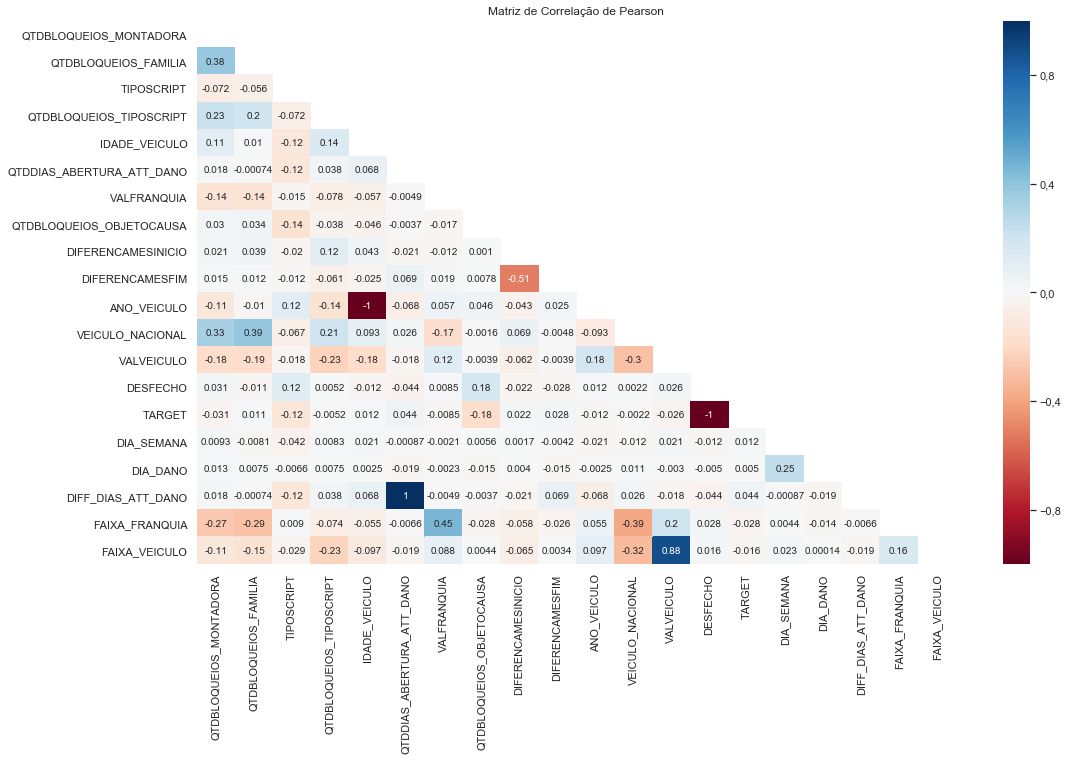

In [72]:
# plt.figure(figsize=(11, 9))
plt.figure(figsize=(17,10))
corr = df1.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, cmap='RdBu',annot=True)
sns.set(style='white')

plt.title('Matriz de Correlação de Pearson')
plt.show()

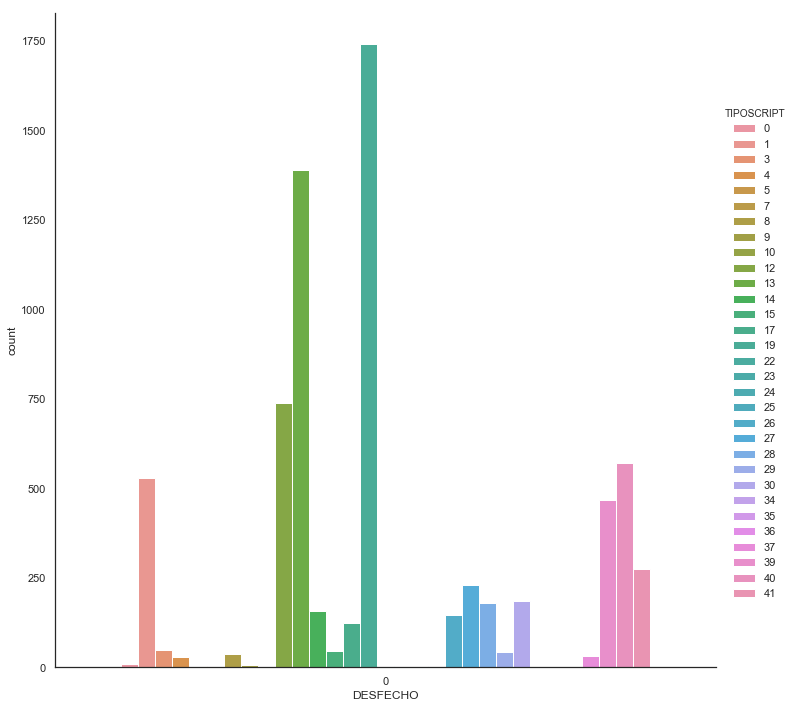

In [73]:
sns.factorplot('DESFECHO', data=df1[df1.TARGET==1], hue='TIPOSCRIPT', kind='count', size=10, aspect=1)

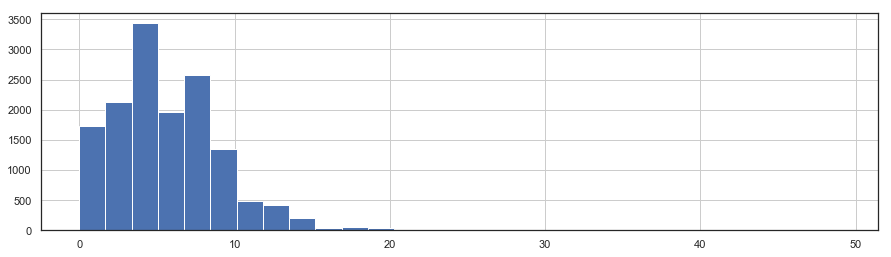

In [74]:
df1.IDADE_VEICULO.hist(bins=int(len(df1.IDADE_VEICULO.unique())), figsize=(15, 4))

Text(0,0.5,'Desfecho')

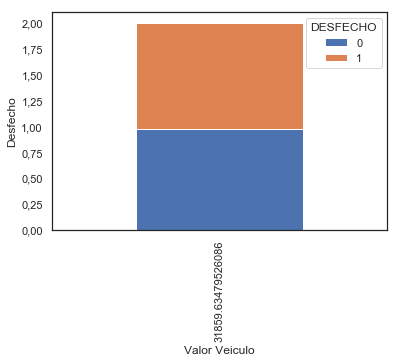

In [75]:
table=pd.crosstab(df1.VALVEICULO.mean(),df1.DESFECHO)
table.div(table.mean(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Valor Veiculo')
plt.ylabel('Desfecho')

In [76]:
from sklearn.utils import shuffle
df1 = shuffle(df1)

In [77]:
df1 = df1.drop(['DESFECHO'], axis=1)

In [78]:
y = df1['TARGET']
X = df1.drop(['TARGET'], axis=1)
seed = 7
test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size , random_state = seed)

In [79]:
X_train.head()

,QTDBLOQUEIOS_MONTADORA,QTDBLOQUEIOS_FAMILIA,TIPOSCRIPT,QTDBLOQUEIOS_TIPOSCRIPT,IDADE_VEICULO,QTDDIAS_ABERTURA_ATT_DANO,VALFRANQUIA,QTDBLOQUEIOS_OBJETOCAUSA,DIFERENCAMESINICIO,DIFERENCAMESFIM,ANO_VEICULO,VEICULO_NACIONAL,VALVEICULO,DIA_SEMANA,DIA_DANO,DIFF_DIAS_ATT_DANO,FAIXA_FRANQUIA,FAIXA_VEICULO
1686,4101,908,13,8488,4,42,120.0,337,316.0,49,2015,1,0,4,4,42,1,0
4515,1847,1119,41,3005,2,0,167.0,1595,38.0,327,2017,1,57114,3,3,0,2,2
956,6472,513,13,8488,6,2,170.0,15652,303.0,62,2013,1,30302,5,3,2,2,1
10664,254,116,27,1471,3,10,250.0,15652,158.0,46,2016,0,0,1,0,10,3,0
9411,7728,61,27,1471,12,9,90.0,4444,60.0,305,2007,0,21544,5,3,9,1,1


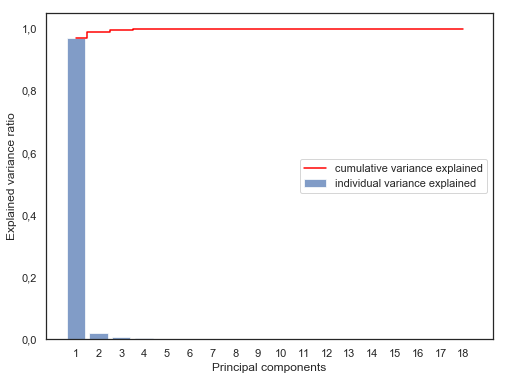

PC1 Cumulative variance: 96.854%
PC2 Cumulative variance: 99.006%
PC3 Cumulative variance: 99.585%
PC4 Cumulative variance: 99.971%
PC5 Cumulative variance: 99.986%
PC6 Cumulative variance: 99.997%
PC7 Cumulative variance: 99.999%
PC8 Cumulative variance: 100.000%
PC9 Cumulative variance: 100.000%
PC10 Cumulative variance: 100.000%
PC11 Cumulative variance: 100.000%
PC12 Cumulative variance: 100.000%
PC13 Cumulative variance: 100.000%
PC14 Cumulative variance: 100.000%
PC15 Cumulative variance: 100.000%
PC16 Cumulative variance: 100.000%
PC17 Cumulative variance: 100.000%
PC18 Cumulative variance: 100.000%


In [80]:
from sklearn.decomposition import PCA
pca = PCA(random_state = seed)
pca.fit(X_train)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize=(8,6))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance explained', \
       alpha = 0.7)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance explained', \
        color= 'red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

# Cumulative variance explained
for i, sum in enumerate(cum_var_exp):
    print("PC" + str(i+1), "Cumulative variance: %.3f% %" %(cum_var_exp[i]*100))

In [81]:
df1.head()

,QTDBLOQUEIOS_MONTADORA,QTDBLOQUEIOS_FAMILIA,TIPOSCRIPT,QTDBLOQUEIOS_TIPOSCRIPT,IDADE_VEICULO,QTDDIAS_ABERTURA_ATT_DANO,VALFRANQUIA,QTDBLOQUEIOS_OBJETOCAUSA,DIFERENCAMESINICIO,DIFERENCAMESFIM,ANO_VEICULO,VEICULO_NACIONAL,VALVEICULO,TARGET,DIA_SEMANA,DIA_DANO,DIFF_DIAS_ATT_DANO,FAIXA_FRANQUIA,FAIXA_VEICULO
5822,169,10,27,1471,10,1,1030.0,9568,259.0,106,2009,0,46860,1,4,6,1,5,2
6314,3943,607,13,8488,9,2,210.0,8578,142.0,10,2010,1,0,1,0,6,2,2,0
6408,3943,161,26,1907,4,1,100.0,15652,185.0,180,2015,1,0,1,5,1,1,1,0
12929,4101,511,13,8488,5,21,163.0,15652,92.0,273,2014,0,45056,0,1,1,21,2,2
13073,7728,648,13,8488,7,64,87.0,15652,219.0,146,2012,1,22599,0,1,3,64,1,1


SVC: 60.556479 (+/- 0.680712) performed in 34.575837 seconds
KNN: 66.187854 (+/- 1.435798) performed in 5.571855 seconds
RF: 79.708599 (+/- 1.123097) performed in 9.533942 seconds
Ada: 73.057206 (+/- 1.239126) performed in 7.761972 seconds
ET: 79.570309 (+/- 0.754511) performed in 9.224723 seconds
GB: 74.214995 (+/- 1.256274) performed in 6.873675 seconds
LR: 59.338715 (+/- 1.720638) performed in 6.433854 seconds


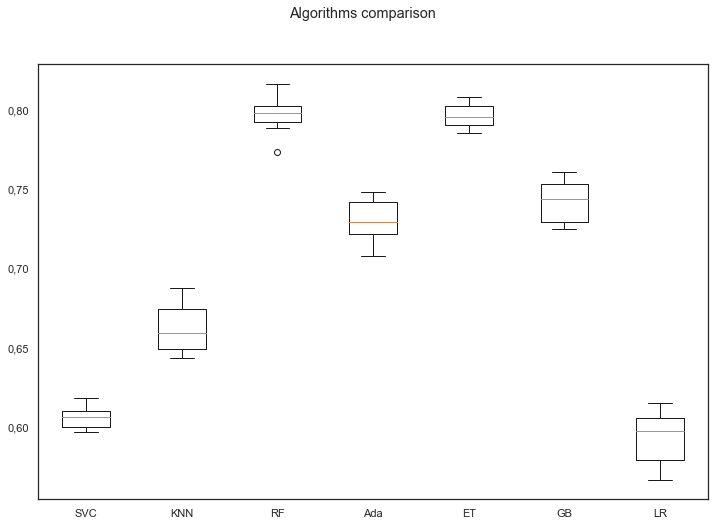

In [82]:
from sklearn.pipeline import Pipeline # streaming pipelines
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from time import time

from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve)

n_components = 20
pipelines = []
n_estimators = 200

#print(df.shape)
pipelines.append( ('SVC',
                   Pipeline([
                              # ('pca', PCA(n_components = n_components, random_state=seed ) ),
                             ('SVC', SVC(random_state=seed))]) ) )


pipelines.append(('KNN',
                  Pipeline([ 
                              
#                             ('pca', PCA(n_components = n_components, random_state=seed ) ),
                            ('KNN', KNeighborsClassifier()) ])))
pipelines.append( ('RF',
                   Pipeline([
                              
#                              ('pca', PCA(n_components = n_components, random_state=seed ) ), 
                             ('RF', RandomForestClassifier(random_state=seed, n_estimators=n_estimators)) ]) ))


pipelines.append( ('Ada',
                   Pipeline([ 
                              
#                              ('pca', PCA(n_components = n_components, random_state=seed ) ), 
                    ('Ada', AdaBoostClassifier(random_state=seed,  n_estimators=n_estimators)) ]) ))

pipelines.append( ('ET',
                   Pipeline([
                             
#                              ('pca', PCA(n_components = n_components, random_state=seed ) ), 
                             ('ET', ExtraTreesClassifier(random_state=seed, n_estimators=n_estimators)) ]) ))
pipelines.append( ('GB',
                   Pipeline([ 
                             
#                             ('pca', PCA(n_components = n_components, random_state=seed ) ), 
                             ('GB', GradientBoostingClassifier(random_state=seed)) ]) ))

pipelines.append( ('LR',
                   Pipeline([
                              
#                               ('pca', PCA(n_components = n_components, random_state=seed ) ), 
                             ('LR', LogisticRegression(random_state=seed)) ]) ))

results, names, times  = [], [] , []
num_folds = 10
scoring = 'accuracy'

for name, model in pipelines:
    start = time()
    kfold = StratifiedKFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring,
                                n_jobs=-1) 
    t_elapsed = time() - start
    results.append(cv_results)
    names.append(name)
    times.append(t_elapsed)
    msg = "%s: %f (+/- %f) performed in %f seconds" % (name, 100*cv_results.mean(), 
                                                       100*cv_results.std(), t_elapsed)
    print(msg)


fig = plt.figure(figsize=(12,8))    
fig.suptitle("Algorithms comparison")
ax = fig.add_subplot(1,1,1)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Seleção de Variaveis: ['QTDBLOQUEIOS_FAMILIA', 'TIPOSCRIPT', 'QTDBLOQUEIOS_TIPOSCRIPT', 'IDADE_VEICULO', 'VALFRANQUIA', 'QTDBLOQUEIOS_OBJETOCAUSA', 'DIFERENCAMESINICIO', 'DIFERENCAMESFIM', 'VALVEICULO', 'DIFF_DIAS_ATT_DANO']
Teste accuracia e 0.8023094688221709


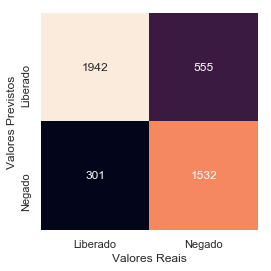

In [83]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
forest = RandomForestClassifier(n_estimators=200, random_state=seed)
Ada = AdaBoostClassifier(random_state=seed,  n_estimators=n_estimators)
lf = LogisticRegression(random_state=seed)

forest.fit(X_train, y_train)
prediction = forest.predict(X_test)
rfe = RFE(forest, 10)
rfe = rfe.fit(X_train, y_train)
        
print('Seleção de Variaveis: %s' % list(X_train.columns[rfe.support_]))
    
print('Teste accuracia e {}'.format(accuracy_score(y_test, prediction)))
    

mat = confusion_matrix(y_test, prediction)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Liberado', 'Negado'], yticklabels=['Liberado', 'Negado'])
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos');
    

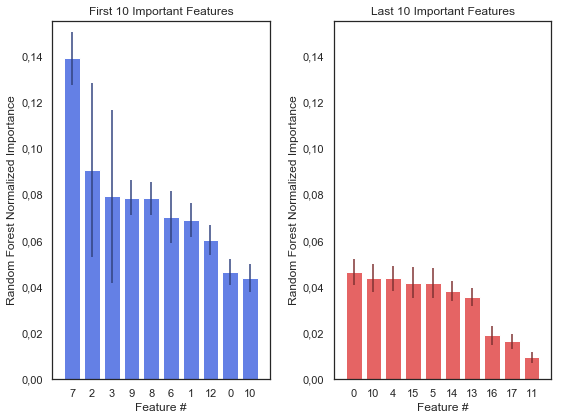

In [84]:
import matplotlib.gridspec as gridspec
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
imp_std = np.std([est.feature_importances_ for est in forest.estimators_], axis=0)

fig = plt.figure(figsize=(8, 6))
gs1 = gridspec.GridSpec(1, 2)
ax1, ax2 = fig.add_subplot(gs1[0]), fig.add_subplot(gs1[1])
ax1.margins(0.05), ax2.margins(0.05) 
ax1.bar(range(10), importances[indices][:10], \
       color="#6480e5", yerr=imp_std[indices][:10], ecolor='#31427e', align="center")
ax2.bar(range(10), importances[indices][-10:], \
       color="#e56464", yerr=imp_std[indices][-10:], ecolor='#7e3131', align="center")
ax1.set_xticks(range(10)), ax2.set_xticks(range(10))
ax1.set_xticklabels(indices[:10]), ax2.set_xticklabels(indices[-10:])
ax1.set_xlim([-1, 10]), ax2.set_xlim([-1, 10])
ax1.set_ylim([0, 0.155]), ax2.set_ylim([0, 0.155])
ax1.set_xlabel('Feature #'), ax2.set_xlabel('Feature #')
ax1.set_ylabel('Random Forest Normalized Importance') 
ax2.set_ylabel('Random Forest Normalized Importance')
ax1.set_title('First 10 Important Features'), ax2.set_title('Last 10 Important Features')
gs1.tight_layout(fig)

In [85]:
X_train.head()

,QTDBLOQUEIOS_MONTADORA,QTDBLOQUEIOS_FAMILIA,TIPOSCRIPT,QTDBLOQUEIOS_TIPOSCRIPT,IDADE_VEICULO,QTDDIAS_ABERTURA_ATT_DANO,VALFRANQUIA,QTDBLOQUEIOS_OBJETOCAUSA,DIFERENCAMESINICIO,DIFERENCAMESFIM,ANO_VEICULO,VEICULO_NACIONAL,VALVEICULO,DIA_SEMANA,DIA_DANO,DIFF_DIAS_ATT_DANO,FAIXA_FRANQUIA,FAIXA_VEICULO
1686,4101,908,13,8488,4,42,120.0,337,316.0,49,2015,1,0,4,4,42,1,0
4515,1847,1119,41,3005,2,0,167.0,1595,38.0,327,2017,1,57114,3,3,0,2,2
956,6472,513,13,8488,6,2,170.0,15652,303.0,62,2013,1,30302,5,3,2,2,1
10664,254,116,27,1471,3,10,250.0,15652,158.0,46,2016,0,0,1,0,10,3,0
9411,7728,61,27,1471,12,9,90.0,4444,60.0,305,2007,0,21544,5,3,9,1,1


In [86]:
pipe_rfc = Pipeline([                      
                    ('rfc', RandomForestClassifier(random_state=seed) )])

# Set the grid parameters
param_grid_rfc =  [ {
    'rfc__n_estimators': [100, 200,300,400], # number of estimators
    #'rfc__criterion': ['gini', 'entropy'],   # Splitting criterion
    'rfc__max_features':[0.05 , 0.1], # maximum features used at each split
    'rfc__max_depth': [None, 5], # Max depth of the trees
    'rfc__min_samples_split': [0.005, 0.01], # mininal samples in leafs
    }]

# Use 10 fold CV
kfold = StratifiedKFold(n_splits=num_folds, random_state= seed)
grid_rfc = GridSearchCV(pipe_rfc, param_grid= param_grid_rfc, cv=kfold, scoring=scoring, verbose= 1, n_jobs=-1)

#Fit the pipeline
start = time()
grid_rfc = grid_rfc.fit(X_train, y_train)
end = time()

print("RFC grid search took %.3f seconds" %(end-start))

# Best score and best parameters
print('-------Melhor score----------')
print(grid_rfc.best_score_ * 100.0)
print('-----Melhores parametros-----')
print(grid_rfc.best_params_)


Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  1.3min finished


RFC grid search took 79.231 seconds
-------Melhor score----------
74.8886469365535
-----Melhores parametros-----
{'rfc__max_features': 0.05, 'rfc__min_samples_split': 0.005, 'rfc__max_depth': None, 'rfc__n_estimators': 400}


In [87]:
def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes,train_mean + train_std,
                    train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='test score', color='red',marker='o')
    plt.fill_between(train_sizes,test_mean + test_std, test_mean - test_std , color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Número do treino por pontos')
    plt.ylabel('Accuracy')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()    
    
def plot_validation_curve(param_range, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(param_range,train_mean + train_std,
                    train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(param_range, test_mean, label='test score', color='red', marker='o')
    plt.fill_between(param_range,test_mean + test_std, test_mean - test_std , color='red', alpha=alpha)
    plt.title(title)
    plt.grid(ls='--')
    plt.xlabel('Parameter value')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()    

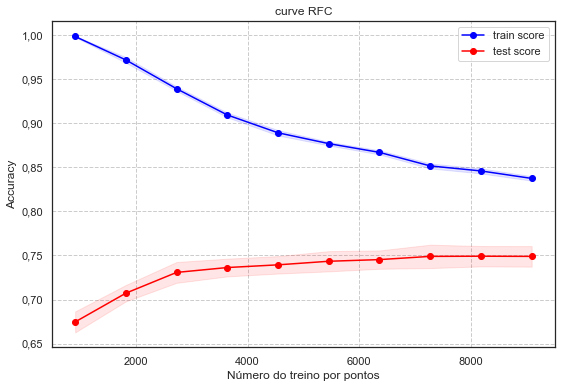

In [88]:
plt.figure(figsize=(9,6))

train_sizes, train_scores, test_scores = learning_curve(
              estimator= grid_rfc.best_estimator_ , X= X_train, y = y_train, 
                train_sizes=np.arange(0.1,1.1,0.1), cv= 10,  scoring='accuracy', n_jobs= - 1)

plot_learning_curve(train_sizes, train_scores, test_scores, title='curve RFC')